### Youtube (오늘코드todaycode)참조


<div align="center"><img src=" ../img/머신러닝.png" ></div>

전체 과정

* feature_names : 학습(훈련), 예측에 사용할 단어 사전입니다.
* label_name : 정답값

* X_train : 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

* model : 학습, 예측에 사용할 머신러닝 알고리즘

* model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.

* model.predict(X_test) : 예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.

* score

    * 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
* metric
    * 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy, 시각화를 위한 seaborn, matplotlib 을 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 윈도우 환경에 따라 한글폰트를 세팅하는 함수 애플,윈도우,리눅스 환경에 따라
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.style.use("seaborn")
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [4]:
get_font_family()

'Malgun Gothic'

### 예제 문서 만들기

In [5]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.", 
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."
         ]

In [7]:
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

In [10]:
# Pandas 의 DataFrame 으로 만듭니다. 리스트 -> 데이타프레임
df = pd.DataFrame(corpus, columns=['문서'])
df

,문서
0,코로나 거리두기와 코로나 상생지원금 문의입니다.
1,지하철 운행시간과 지하철 요금 문의입니다.
2,지하철 승강장 문의입니다.
3,코로나 선별진료소 문의입니다.
4,버스 운행시간 문의입니다.
5,버스 터미널 위치 안내입니다.
6,코로나 거리두기 안내입니다.
7,택시 승강장 문의입니다.


### 정답 데이터 만들기
* 코로나가 들어가면 "보건"으로 그 외는 "교통"으로 레이블링

In [18]:
# str.contains 를 통해 특정 텍스트가 들어가는 여부를 알 수 있음
# "코로나" 가 들어가는 텍스트 찾기
df[df['문서'].str.contains('코로나')]

,문서
0,코로나 거리두기와 코로나 상생지원금 문의입니다.
3,코로나 선별진료소 문의입니다.
6,코로나 거리두기 안내입니다.


In [24]:
# loc[행, 열]
# loc[조건, 열]
# loc[조건, 열] = 대체값 으로 특정 열에 해당하는 값을 변경
# "코로나"가 포함이면 "보건"으로 나머지는 "교통" 으로 정답을 레이블링
df.loc[df['문서'].str.contains('코로나'), '분류'] = '보건'
df.loc[~df['문서'].str.contains('코로나'), '분류'] = '교통'

In [25]:
# 잘 만들어졌는지 확인하기
df

,문서,분류
0,코로나 거리두기와 코로나 상생지원금 문의입니다.,보건
1,지하철 운행시간과 지하철 요금 문의입니다.,교통
2,지하철 승강장 문의입니다.,교통
3,코로나 선별진료소 문의입니다.,보건
4,버스 운행시간 문의입니다.,교통
5,버스 터미널 위치 안내입니다.,교통
6,코로나 거리두기 안내입니다.,보건
7,택시 승강장 문의입니다.,교통


In [27]:
# 정답 값 빈도수 확인하기
df['분류'].value_counts()

교통    5
보건    3
Name: 분류, dtype: int64

### 텍스트 데이터 수치 형태로 변경하기

In [31]:
# sklearn.feature_extraction.text의 CountVectorizer 로 BOW 벡터화
# fit_transform 으로 변환하기
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()
dtm = cvect.fit_transform(df['문서'])
dtm

<8x16 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

### DTM(document-term matrix)

In [35]:
# 피처 가져오기
# get_feature_names is deprecated in 1.0 and will be removed in 1.2
# feature_names
feature_names = cvect.get_feature_names()
feature_names

['거리두기',
 '거리두기와',
 '문의입니다',
 '버스',
 '상생지원금',
 '선별진료소',
 '승강장',
 '안내입니다',
 '요금',
 '운행시간',
 '운행시간과',
 '위치',
 '지하철',
 '코로나',
 '택시',
 '터미널']

In [36]:
# 리스트의 순서를 표시해준다
cvect.vocabulary_

{'코로나': 13,
 '거리두기와': 1,
 '상생지원금': 4,
 '문의입니다': 2,
 '지하철': 12,
 '운행시간과': 10,
 '요금': 8,
 '승강장': 6,
 '선별진료소': 5,
 '버스': 3,
 '운행시간': 9,
 '터미널': 15,
 '위치': 11,
 '안내입니다': 7,
 '거리두기': 0,
 '택시': 14}

In [39]:
# dtm(document-term matrix)
pd.DataFrame(dtm.toarray(), columns = feature_names)

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


### 문제와 정답 만들기

In [40]:
# 독립변수로 사용할 X 변수에 dtm array 를 할당
# 예) 시험문제
X = dtm.toarray()
X

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [41]:
# 종속변수로 사용할 y 변수에 정답값인 "category" 값을 할당
# 예) 시험의 정답 값
y = df['분류']
y

0    보건
1    교통
2    교통
3    보건
4    교통
5    교통
6    보건
7    교통
Name: 분류, dtype: object

### 데이터셋 나누기
* 데이터셋을 나눌 때 가장 흔히 하는 실수는 무엇일까요?
* train, test 를 잘못 나누는 일이에요! 문제와 정답의 수가 맞는지 확인해 보세요!

In [42]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

6

In [44]:
# 학습 세트 만들기 예) 시험의 기출문제
# 학습 세트의 정답 만들기 예) 기출문제의 정답
# X_train, y_train
X_train = X[:split_count]
y_train = y[:split_count]
print(X_train.shape, y_train.shape)
X_train, y_train

(6, 16) (6,)


(array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]], dtype=int64),
 0    보건
 1    교통
 2    교통
 3    보건
 4    교통
 5    교통
 Name: 분류, dtype: object)

In [45]:
# 예측 세트 만들기 예) 실전 시험문제
# 예측 세트의 정답 만들기 예) 실전 문제의 정답
# X_test, y_test
X_test = X[split_count:]
y_test = y[split_count:]
print(X_test.shape, y_test.shape)
X_test, y_test

(2, 16) (2,)


(array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64),
 6    보건
 7    교통
 Name: 분류, dtype: object)

### 머신러닝 모델 로드하기

In [55]:
# DecisionTreeClassifier 를 사용합니다.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [56]:
# fit(기출문제, 정답)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [58]:
# predict(실전문제)
y_predict = model.predict(X_test)
y_predict

array(['보건', '교통'], dtype=object)

### 평가
* 정확도(Accuracy) 측정하기

In [60]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.
(y_test == y_predict).mean() * 100

100.0

In [61]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
# sklearn.metrics 의 accuracy_score 를 가져옵니다.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

1.0

In [62]:
# crosstab 으로 confusion matrix 를 구합니다.
pd.crosstab(y_test,y_predict)

col_0,교통,보건
분류,,
교통,1,0
보건,0,1


In [64]:
# confusion_matrix 를 통해 구할 수도 있습니다.
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predict)

array([[1, 0],
       [0, 1]], dtype=int64)

### 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

In [77]:
# export_text 로 트리 분석하기, sklearn버전이 낮아 오류가 발생....
# from sklearn.tree import export_text

# print(export_text(model))

In [78]:
# plot_tree 로 시각화 하기, sklearn버전이 낮아 오류가 발생....
# from sklearn.tree import plot_tree
# plot_tree(model, feature_names=feature_names)

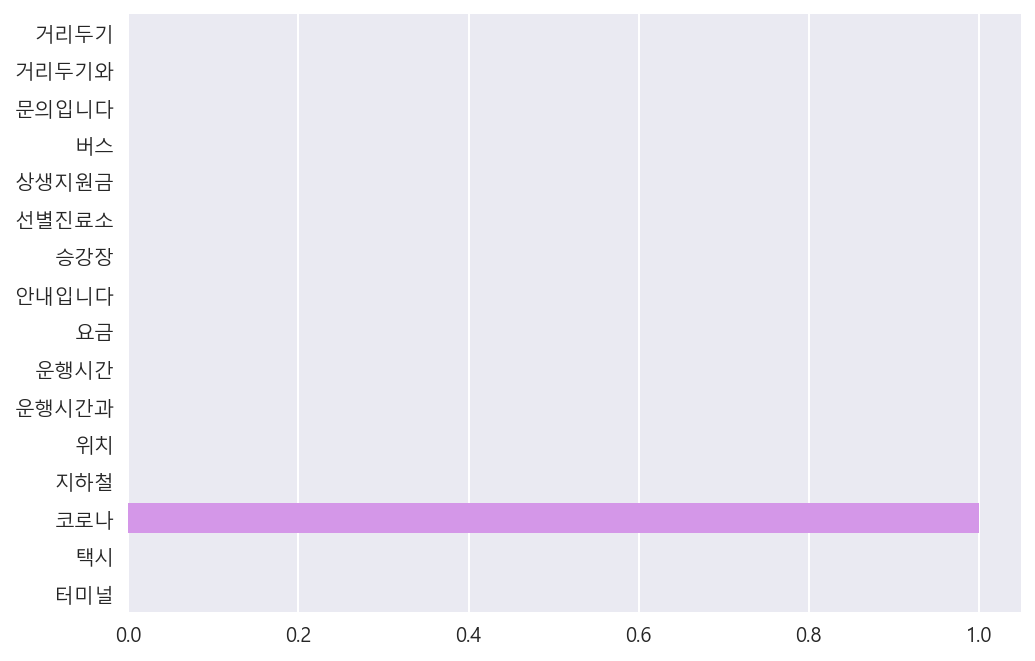

In [80]:
# feature_importances_로 피처 중요도 확인하기
sns.barplot(x= model.feature_importances_ , y=feature_names)